<a href="https://colab.research.google.com/github/andd3r5/Text_Mining_Project/blob/main/TM_Project_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/My Drive/S&ML/Text_mining/Reviews.csv" .


Mounted at /content/drive


In [2]:
import sys
sys.stdout = open("/content/drive/My Drive/S&ML/Text_mining/roberta_res.txt", 'w')

#Setup

First try number of different methods, then optimize preprocessing, then parameters
compare improved methods

In [2]:
#creation of timer class
import time

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")

In [3]:
#!pip install joblib
#import joblib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from numpy import interp
from sklearn.model_selection import GridSearchCV

In [5]:
data = pd.read_csv('Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
data.dropna(subset=['Summary'], inplace=True)
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    0
Text                       0
dtype: int64

Text(0.5, 1.02, 'Distribution of User Ratings')

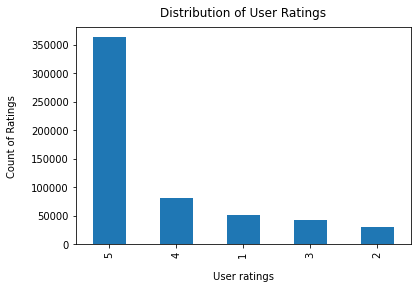

In [8]:
data['Score'].value_counts().plot(kind='bar')
plt.xlabel("User ratings", labelpad=14)
plt.ylabel("Count of Ratings", labelpad=14)
plt.title("Distribution of User Ratings", y=1.02)

In [9]:
data.shape[0] * 0.001

568.427

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(data.drop('Score', axis=1), data['Score'], random_state=0)

training_data, test_data = train_test_split(data, random_state=0)

In [11]:
training_data.shape

(426320, 10)

In [12]:
n_min = min(training_data['Score'].value_counts())

# Sample n_min observations of each class
balanced = training_data.groupby('Score').apply(lambda x: x.sample(n=n_min, replace=False))
balanced_comparison = training_data.sample(n=n_min*5, replace=False)

print(balanced.shape)

(111350, 10)


In [13]:
train_data_25k = training_data.groupby('Score').apply(lambda x: x.sample(n=5000, replace=False))

# Comparison

In [16]:
training_data, test_data = train_test_split(data, random_state=0, train_size = 0.9, test_size = 0.1)
print('MultinomialNB')
print(0.9)
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(binary=True,ngram_range=(2,2))), ('model', MultinomialNB(alpha=1))])
# pipe = Pipeline(steps=[('preprocessor', CountVectorizer(ngram_range=(1, 2), binary=True)), ('model', BernoulliNB())])
t = Timer()
t.start()
fit_pipe = pipe.fit(training_data['Text'], training_data['Score'])
t.stop()

preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

MultinomialNB
0.9
Elapsed time: 76.3909 seconds
              precision    recall  f1-score   support

           1       0.84      0.64      0.73      5360
           2       0.96      0.27      0.42      2996
           3       0.83      0.34      0.48      4194
           4       0.66      0.40      0.50      7894
           5       0.79      0.98      0.88     36399

    accuracy                           0.79     56843
   macro avg       0.81      0.53      0.60     56843
weighted avg       0.79      0.79      0.76     56843



In [110]:
0.025*5*5

0.625

In [111]:
train_size = 0.9

In [21]:
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(binary=True,ngram_range=(2,2))), ('model', MultinomialNB(alpha=1))])
fit_pipe = pipe.fit(balanced['Summary'], balanced['Score'])
preds = pipe.predict(test_data['Summary'])
print(classification_report(test_data['Score'], preds, zero_division = 0))

              precision    recall  f1-score   support

           1       0.25      0.72      0.37      5360
           2       0.32      0.48      0.38      2996
           3       0.38      0.51      0.44      4194
           4       0.34      0.44      0.39      7894
           5       0.90      0.52      0.66     36399

    accuracy                           0.53     56843
   macro avg       0.44      0.53      0.45     56843
weighted avg       0.69      0.53      0.56     56843



In [26]:
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(binary=True,ngram_range=(2,2))), ('model', MultinomialNB(alpha=1))])
fit_pipe = pipe.fit(balanced_comparison['Summary'], balanced_comparison['Score'])
preds = pipe.predict(test_data['Summary'])
print(classification_report(test_data['Score'], preds, zero_division = 0))

              precision    recall  f1-score   support

           1       0.71      0.40      0.51      5360
           2       0.67      0.14      0.23      2996
           3       0.57      0.28      0.38      4194
           4       0.52      0.21      0.30      7894
           5       0.74      0.98      0.84     36399

    accuracy                           0.72     56843
   macro avg       0.64      0.40      0.45     56843
weighted avg       0.69      0.72      0.67     56843



In [112]:
training_data, test_data = train_test_split(data, random_state=0, train_size = train_size, test_size = 0.1)
#transformer data
ttrain = training_data[['Text', 'Score']]
ttrain = ttrain.rename(columns={'Text': "text", 'Score':'labels'})
#make score start from 0
ttrain.labels = ttrain.labels - 1
ttest = test_data[['Text', 'Score']]
ttest = ttest.rename(columns={'Text': "text", 'Score':'labels'})
#make score start from 0
ttest.labels = ttest.labels - 1

In [16]:
for train_size in (0.001,0.005,0.025,0.125,0.625, 0.9):
  training_data, test_data = train_test_split(data, random_state=0, train_size = train_size, test_size = 0.1)
  print('BernoulliNB')
  print(train_size)
  #pipe = Pipeline(steps=[('preprocessor', CountVectorizer(binary=True,ngram_range=(2,2))), ('model', MultinomialNB(alpha=1))])
  pipe = Pipeline(steps=[('preprocessor', CountVectorizer(ngram_range=(1, 2), binary=True)), ('model', BernoulliNB())])
  t = Timer()
  t.start()
  fit_pipe = pipe.fit(training_data['Summary'], training_data['Score'])
  t.stop()

  preds = pipe.predict(test_data['Summary'])

  print(classification_report(test_data['Score'], preds, zero_division = 0))

BernoulliNB
0.001
Elapsed time: 0.0433 seconds
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      5360
           2       0.00      0.00      0.00      2996
           3       0.00      0.00      0.00      4194
           4       0.17      0.00      0.00      7894
           5       0.64      1.00      0.78     36399

    accuracy                           0.64     56843
   macro avg       0.36      0.20      0.16     56843
weighted avg       0.53      0.64      0.50     56843

BernoulliNB
0.005
Elapsed time: 0.0449 seconds
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      5360
           2       0.00      0.00      0.00      2996
           3       1.00      0.00      0.00      4194
           4       0.47      0.00      0.01      7894
           5       0.64      1.00      0.78     36399

    accuracy                           0.64     56843
   macro avg       0.62      0.20    

In [113]:
training_data.shape

(511584, 10)

In [114]:
print('MultinomialNB')
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(ngram_range= (1, 2))),('tfidf', TfidfTransformer(use_idf=False)), ('model', MultinomialNB(alpha=0.1))])
t = Timer()
t.start()
fit_pipe = pipe.fit(training_data['Text'], training_data['Score'])
t.stop()

preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

MultinomialNB
Elapsed time: 115.4999 seconds
              precision    recall  f1-score   support

           1       0.92      0.27      0.42      5360
           2       1.00      0.03      0.06      2996
           3       0.98      0.06      0.11      4194
           4       0.91      0.09      0.17      7894
           5       0.67      1.00      0.80     36399

    accuracy                           0.68     56843
   macro avg       0.90      0.29      0.31     56843
weighted avg       0.77      0.68      0.59     56843



In [115]:
print('BernoulliNB')
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(ngram_range=(1, 2), binary=True)), ('model', BernoulliNB())])
t = Timer()
t.start()
fit_pipe = pipe.fit(training_data['Text'], training_data['Score'])
t.stop()

preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

BernoulliNB
Elapsed time: 111.7712 seconds
              precision    recall  f1-score   support

           1       0.79      0.33      0.46      5360
           2       0.91      0.10      0.18      2996
           3       0.58      0.17      0.27      4194
           4       0.44      0.30      0.36      7894
           5       0.71      0.94      0.81     36399

    accuracy                           0.69     56843
   macro avg       0.69      0.37      0.42     56843
weighted avg       0.68      0.69      0.64     56843



In [116]:
print('LinearSVC')
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(ngram_range= (1, 2), binary=True)),('tfidf', TfidfTransformer(use_idf=True)), ('model', svm.LinearSVC())])
t = Timer()
t.start()
fit_pipe = pipe.fit(training_data['Text'], training_data['Score'])
t.stop()

preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

LinearSVC
Elapsed time: 242.6596 seconds
              precision    recall  f1-score   support

           1       0.80      0.82      0.81      5360
           2       0.72      0.51      0.60      2996
           3       0.70      0.58      0.63      4194
           4       0.72      0.57      0.64      7894
           5       0.89      0.97      0.93     36399

    accuracy                           0.84     56843
   macro avg       0.77      0.69      0.72     56843
weighted avg       0.83      0.84      0.84     56843



# Comparison Transformer (needs GPU)

In [14]:
%%capture
!pip install simpletransformers

In [17]:
%%capture
!pip install -U ipykernel

In [18]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
model_args = ClassificationArgs()
model_args.overwrite_output_dir= True
# Create a ClassificationModel
model = ClassificationModel('roberta', 'roberta-base', num_labels=5, args=model_args)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
for train_size in (0.125,0.625):
  training_data, test_data = train_test_split(data, random_state=0, train_size = train_size, test_size = 0.1)
  #transformer data
  ttrain = training_data[['Text', 'Score']]
  ttrain = ttrain.rename(columns={'Text': "text", 'Score':'labels'})
  ttest = test_data[['Text', 'Score']]
  ttest = ttest.rename(columns={'Text': "text", 'Score':'labels'})
  #make score start from 0
  ttrain.labels = ttrain.labels - 1
  ttest.labels = ttest.labels - 1
  print('RoBERTa')
  print(train_size)
  t = Timer()
  t.start()
  model.train_model(ttrain, )
  t.stop()
  preds, raw_outputs = model.predict(ttest['text'].tolist()) #as list, alter model parameters
  print(classification_report(ttest.labels, preds, zero_division = 0))

  0%|          | 0/71053 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/8882 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


# Naive Bayes



**Full data**

In [ ]:
pipe = Pipeline(steps=[('preprocessor', CountVectorizer()),('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

t = Timer()
t.start()
fit_pipe = pipe.fit(training_data['Text'], training_data['Score'])
t.stop()

preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

              precision    recall  f1-score   support

           1       0.56      0.65      0.60     13165
           2       0.42      0.23      0.30      7474
           3       0.41      0.32      0.36     10602
           4       0.39      0.38      0.38     19950
           5       0.83      0.87      0.85     90916

    accuracy                           0.70    142107
   macro avg       0.52      0.49      0.50    142107
weighted avg       0.69      0.70      0.69    142107



              precision    recall  f1-score   support

           1       0.56      0.65      0.60     13165
           2       0.42      0.23      0.30      7474
           3       0.41      0.32      0.36     10602
           4       0.39      0.38      0.38     19950
           5       0.83      0.87      0.85     90916

    accuracy                           0.70    142107
    macro avg       0.52      0.49      0.50    142107
    weighted avg       0.69      0.70      0.69    142107

* Precision: number of correctly classified over all the observations labeled in a class. The classes with larger number of observations have worst precision as the classifier labels too many observations as those classes.
* Recall: proportion of correctly classified documents among all documents from that class. The "large" classes have a good recall due the fact that the model labels many observations in those classes. The "false positives" are not present. In contrast, the other classes have a very bad recall.
* f1-score: a balanced score between precision and recall. It is good for samples were classes have very different sizes. It combines both precision and recall

In [ ]:
np.mean(preds==test_data['Score'])

0.703216590315748

**Balanced data**

In [ ]:
pipe = Pipeline(steps=[('preprocessor', CountVectorizer()), ('model', MultinomialNB())])

t = Timer()
t.start()
fit_pipe = pipe.fit(balanced['Text'], balanced['Score'])
t.stop()

preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

              precision    recall  f1-score   support

           1       0.47      0.61      0.53     13165
           2       0.25      0.47      0.33      7474
           3       0.30      0.42      0.35     10602
           4       0.30      0.45      0.36     19950
           5       0.90      0.66      0.76     90916

    accuracy                           0.60    142107
    macro avg       0.44      0.52      0.47    142107
    weighted avg       0.70      0.60      0.63    142107

**Parameter optimisation 25k data**

In [ ]:
#('tfidf', TfidfTransformer()),
#'tfidf__use_idf':[True, False],

In [18]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(ngram_range= (1, 2))),('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

# Hyperparameters values
parameters = {'tfidf__use_idf':[True, False],
              'model__alpha':[1,0.1]}

grid_search = GridSearchCV(pipe, parameters, n_jobs=-1)

gs_fit = grid_search.fit(train_data_25k['Text'], train_data_25k['Score'])

best_parameters = grid_search.best_estimator_.get_params()

print("Best parameters set:")
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best parameters set:
	model__alpha: 0.1
	tfidf__use_idf: False


Best parameters set with Tfidf:

	model__alpha: 0.1
	tfidf__use_idf: False

Best parameters set:

	model__alpha: 1
	preprocessor__analyzer: 'word'
	preprocessor__binary: True
	preprocessor__ngram_range: (1, 2)
	preprocessor__stop_words: None

In [25]:
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(ngram_range= (1, 2), binary=True)), ('model', MultinomialNB())])
fit_pipe = pipe.fit(train_data_25k['Text'], train_data_25k['Score'])
preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

              precision    recall  f1-score   support

           1       0.58      0.59      0.59     13165
           2       0.28      0.51      0.36      7474
           3       0.26      0.58      0.36     10602
           4       0.25      0.53      0.34     19950
           5       0.94      0.51      0.66     90916

    accuracy                           0.53    142107
   macro avg       0.46      0.55      0.46    142107
weighted avg       0.72      0.53      0.57    142107



In [24]:
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(ngram_range= (1, 2))),('tfidf', TfidfTransformer(use_idf=False)), ('model', MultinomialNB(alpha=0.1))])
fit_pipe = pipe.fit(train_data_25k['Text'], train_data_25k['Score'])
preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

              precision    recall  f1-score   support

           1       0.58      0.63      0.61     13165
           2       0.30      0.51      0.38      7474
           3       0.30      0.56      0.39     10602
           4       0.27      0.53      0.36     19950
           5       0.93      0.58      0.71     90916

    accuracy                           0.57    142107
   macro avg       0.48      0.56      0.49    142107
weighted avg       0.72      0.57      0.61    142107



**BernoulliNB**

In [17]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(ngram_range=(1, 2), binary=True)), ('model', BernoulliNB())])

# Hyperparameters values
parameters = {'model__alpha':[1,0.1]}

grid_search = GridSearchCV(pipe, parameters, n_jobs=-1)

gs_fit = grid_search.fit(train_data_25k['Text'], train_data_25k['Score'])

best_parameters = grid_search.best_estimator_.get_params()

print("Best parameters set:")
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best parameters set:
	model__alpha: 0.1


Best parameters set:

	model__alpha: 0.1

In [ ]:
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(binary=True,
              ngram_range=(2,2))), ('model', MultinomialNB(alpha=1))])
fit_pipe = pipe.fit(training_data['Text'], training_data['Score'])

preds = pipe.predict(test_data['Text'])
print(classification_report(test_data['Score'], preds, zero_division = 0))

              precision    recall  f1-score   support

           1       0.84      0.61      0.71     13165
           2       0.96      0.25      0.40      7474
           3       0.84      0.31      0.46     10602
           4       0.67      0.37      0.48     19950
           5       0.78      0.99      0.87     90916

    accuracy                           0.78    142107
    macro avg       0.82      0.51      0.58    142107
    weighted avg       0.78      0.78      0.74    142107

**Parameter optimisation balanced**

In [ ]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline(steps=[('preprocessor', CountVectorizer()), ('model', MultinomialNB())])


# Hyperparameters values
parameters = {'preprocessor__binary':[True, False],
              'preprocessor__ngram_range':((1,1),(2,2)),
              'model__alpha':[1,0.1]}

grid_search = GridSearchCV(pipe, parameters)

gs_fit = grid_search.fit(balanced['Text'], balanced['Score'])

best_parameters = grid_search.best_estimator_.get_params()

print("Best parameters set:")
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best parameters set:
* model__alpha: 1
* preprocessor__binary: True
* preprocessor__ngram_range: (2, 2)



In [ ]:
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(binary=True,
              ngram_range=(2,2))), ('model', MultinomialNB(alpha=1))])
fit_pipe = pipe.fit(balanced['Text'], balanced['Score'])

preds = pipe.predict(test_data['Text'])
print(classification_report(test_data['Score'], preds, zero_division = 0))

              precision    recall  f1-score   support

           1       0.67      0.68      0.67     13165
           2       0.40      0.61      0.48      7474
           3       0.37      0.64      0.47     10602
           4       0.32      0.62      0.43     19950
           5       0.94      0.63      0.75     90916

    accuracy                           0.63    142107
   macro avg       0.54      0.64      0.56    142107
weighted avg       0.76      0.63      0.66    142107



              precision    recall  f1-score   support

           1       0.67      0.68      0.67     13165
           2       0.40      0.61      0.48      7474
           3       0.37      0.64      0.47     10602
           4       0.32      0.62      0.43     19950
           5       0.94      0.63      0.75     90916

    accuracy                           0.63    142107
    macro avg       0.54      0.64      0.56    142107
    weighted avg       0.76      0.63      0.66    142107

# SVM

In [ ]:
pipe = Pipeline(steps=[('preprocessor', CountVectorizer()), ('model', svm.SVC())])
t = Timer()
t.start()
fit_pipe = pipe.fit(balanced['Text'], balanced['Score'])
t.stop()
preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

              precision    recall  f1-score   support

           1       0.58      0.71      0.64     13165
           2       0.34      0.53      0.41      7474
           3       0.34      0.53      0.41     10602
           4       0.36      0.47      0.41     19950
           5       0.91      0.71      0.80     90916

    accuracy                           0.65    142107
   macro avg       0.50      0.59      0.53    142107
weighted avg       0.73      0.65      0.68    142107



              precision    recall  f1-score   support

           1       0.58      0.71      0.64     13165
           2       0.34      0.53      0.41      7474
           3       0.34      0.53      0.41     10602
           4       0.36      0.47      0.41     19950
           5       0.91      0.71      0.80     90916

    accuracy                           0.65    142107
    macro avg       0.50      0.59      0.53    142107
    weighted avg       0.73      0.65      0.68    142107

In [ ]:
# Save RL_Model to file in the current working directory

joblib_file = "SVM_SVC_balanced.pkl"  
joblib.dump(fit_pipe, joblib_file)

['SVM_SVC_balanced.pkl']

**Linear Support Vector Classification**

In [ ]:
pipe = Pipeline(steps=[('preprocessor', CountVectorizer()), ('model', svm.LinearSVC())])

t=Timer()
t.start()
fit_pipe = pipe.fit(balanced['Text'], balanced['Score'])
t.stop()

preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

In [ ]:
plot_confusion_matrix(fit_pipe, test_data['Text'], test_data['Score'], cmap=plt.cm.Blues)

plt.show()

In [ ]:
# Save RL_Model to file in the current working directory

joblib_file = "SVM_linSVC_balanced.pkl"  
joblib.dump(fit_pipe, joblib_file)

In [14]:
pipe = Pipeline(steps=[('vect', CountVectorizer(ngram_range = (1,2))), ('model', svm.LinearSVC())])

parameters = {'vect__binary':[True, False],
              'model__loss': ['hinge', 'squared_hinge'],
              'model__C': [1, 10, 100]}

grid_search = GridSearchCV(pipe, parameters)

best_fit = grid_search.fit(train_data_25k['Text'], train_data_25k['Score'])

best_parameters = grid_search.best_estimator_.get_params()

print("Best parameters set:")
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best parameters set:
	model__C: 1
	model__loss: 'squared_hinge'
	vect__binary: True


In [36]:
pipe = Pipeline(steps=[('vect', CountVectorizer(ngram_range = (1,2), binary=True)), ('model', svm.LinearSVC())])
fit_pipe = pipe.fit(train_data_25k['Text'], train_data_25k['Score'])
preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           1       0.58      0.66      0.62     13165
           2       0.28      0.48      0.36      7474
           3       0.31      0.47      0.37     10602
           4       0.30      0.47      0.37     19950
           5       0.90      0.67      0.77     90916

    accuracy                           0.61    142107
   macro avg       0.48      0.55      0.50    142107
weighted avg       0.71      0.61      0.65    142107



In [37]:
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(ngram_range= (1, 2), binary=True)),('tfidf', TfidfTransformer(use_idf=True)), ('model', svm.LinearSVC())])
fit_pipe = pipe.fit(train_data_25k['Text'], train_data_25k['Score'])
preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

              precision    recall  f1-score   support

           1       0.61      0.70      0.65     13165
           2       0.33      0.48      0.39      7474
           3       0.36      0.49      0.41     10602
           4       0.34      0.50      0.41     19950
           5       0.91      0.72      0.80     90916

    accuracy                           0.66    142107
   macro avg       0.51      0.58      0.53    142107
weighted avg       0.73      0.66      0.68    142107



In [28]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(ngram_range= (1, 2))),('tfidf', TfidfTransformer()), ('model', svm.LinearSVC())])

# Hyperparameters values
parameters = {'tfidf__use_idf':[True, False],
              'preprocessor__binary':[True, False]}

grid_search = GridSearchCV(pipe, parameters, n_jobs=-1)

gs_fit = grid_search.fit(train_data_25k['Text'], train_data_25k['Score'])

best_parameters = grid_search.best_estimator_.get_params()

print("Best parameters set:")
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best parameters set:
	preprocessor__binary: True
	tfidf__use_idf: True


Best parameters set:

	model__C: 1
	model__loss: 'squared_hinge'
	vect__binary: True

In [ ]:
plot_confusion_matrix(best_fit, test_data['Text'], test_data['Score'], cmap=plt.cm.Blues)
plt.show()

In [ ]:
pipe = Pipeline(steps=[('preprocessor', CountVectorizer(binary=True,
              ngram_range=(2,2))), ('model', svm.LinearSVC())])
fit_pipe = pipe.fit(balanced['Text'], balanced['Score'])

preds = pipe.predict(test_data['Text'])
print(classification_report(test_data['Score'], preds, zero_division = 0))

# SGD

**Balanced Data including parameter optimisation**

In [ ]:
pipe = Pipeline(steps=[('vect', CountVectorizer()), ('model', SGDClassifier())])

t = Timer()
t.start()
fit_pipe = pipe.fit(balanced['Text'], balanced['Score'])
t.stop()

preds = pipe.predict(test_data['Text'])

print(classification_report(test_data['Score'], preds, zero_division = 0))

In [ ]:
pipe = Pipeline(steps=[('vect', CountVectorizer()), ('model', SGDClassifier())])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2), (2,2)),  # unigrams or bigrams
    'model__max_iter': (10, 50, 80),
    'model__alpha': (0.00001, 0.000001),
    'model__penalty': ('l2', 'elasticnet'),
}

grid_search = GridSearchCV(pipe, parameters,n_jobs=-1)

best_fit = grid_search.fit(training_data['Text'], training_data['Score'])

best_parameters = grid_search.best_estimator_.get_params()

print("Best parameters set:")
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
plot_confusion_matrix(best_fit, test_data['Text'], test_data['Score'], cmap=plt.cm.Blues)
plt.show()

# Transformer

In [ ]:
!pip install simpletransformers

In [ ]:
!pip install -U ipykernel

In [ ]:
transformer_args = {
    "output_dir": "outputs/",
    "cache_dir": "cache_dir/",

    "fp16": True,
    "fp16_opt_level": "O1",
    "max_seq_length": 128,
    "train_batch_size": 8,
    "gradient_accumulation_steps": 1,
    "eval_batch_size": 8,
    "num_train_epochs": 1,
    "weight_decay": 0,
    "learning_rate": 4e-5,
    "adam_epsilon": 1e-8,
    "warmup_ratio": 0.06,
    "warmup_steps": 0,
    "max_grad_norm": 1.0,

    "logging_steps": 50,
    "save_steps": 2000,

    "overwrite_output_dir": False,
    "reprocess_input_data": False,
    "evaluate_during_training": False,

    "process_count": cpu_count() - 2 if cpu_count() > 2 else 1,
    "n_gpu": 1,
}

In [ ]:
from simpletransformers.classification import ClassificationModel

# Create a ClassificationModel
model = ClassificationModel('roberta', 'roberta-base', num_labels=5)
#model = ClassificationModel('roberta', 'roberta-base', num_labels=5, args=transformer_args)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
ttrain = train_data_25k[['Text', 'Score']]
ttrain = ttrain.rename(columns={'Text': "text", 'Score':'labels'})
#make score start from 0
ttrain.labels = ttrain.labels - 1
ttrain.head()
#ttrain.labels.unique().shape()

text  labels
Score                                                                  
1     221431  I can't recommend these simply because I feel ...       0
      257678  This milo comes somewhere from the east and is...       0
      288690  I love pretzels, but these were the absolute f...       0
      295431  I used to buy Gerber baby foods and was thrill...       0
      441260  Sickeningly sweet. I don't expect a sugar-free...       0

In [ ]:
t = Timer()
t.start()
model.train_model(ttrain)
t.stop()

  0%|          | 0/25000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/3125 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Elapsed time: 475.1527 seconds


Elapsed time: 475.1527 seconds for training 25000 reviews

In [ ]:
joblib_file = "Roberta_train.pkl"  
joblib.dump(fit_pipe, joblib_file)

In [29]:
test_data = test_data[['Text', 'Score']]
test_data = test_data.rename(columns={'Text': "text", 'Score':'labels'})
test_data.labels = test_data.labels - 1
test_data = test_data.iloc[1:2]
test_data.head()

,text,labels
55768,"I am a mother of three (ages 18, 13 and 5) and...",4


In [22]:
#test_data = test_data.drop(['index'], axis=1)
ttest_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
422752,422753,B001BM4NAE,A18HMSRFVY0R60,Janie,1,1,5,1336262400,Fantastic chips! The best ever!,Seriously the best tortilla chips - or chips o...
55768,55769,B005GYS0PW,A1PW7I7DRW3HQD,E. Fisher,1,1,5,1347494400,Eric's are AWESOME!!!!,"I am a mother of three (ages 18, 13 and 5) and..."
200408,200409,B00384GGGC,AB3IAXACS5ZFX,Christina Stearns,2,2,5,1313884800,"Great ""On The Go"" Breakfast",I bought this product b/c I tasted it once and...
123087,123088,B000CQBZOW,A2TJRU4YXKTZIW,rbeditrix,0,0,5,1293753600,Why is this tea not famous and widely available?,You used to be able to find Stash Licorice at ...
314876,314877,B000NMCSF0,AUMVH73FBH9S0,Rock n Roll Fan,1,2,5,1207612800,An acquired taste,To know C Howards Violets is to love them. th...


In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test_data)

  0%|          | 0/142107 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/17764 [00:00<?, ?it/s]

In [ ]:
result

{'eval_loss': 0.7604092654198126, 'mcc': 0.5138685956510659}

In [ ]:
predictions, raw_outputs = model.predict(test_data.text)

  0%|          | 0/142107 [00:00<?, ?it/s]

  0%|          | 0/17764 [00:00<?, ?it/s]

In [ ]:
print(classification_report(test_data.labels, predictions, zero_division = 0))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68     13165
           1       0.36      0.54      0.43      7474
           2       0.39      0.46      0.42     10602
           3       0.39      0.49      0.43     19950
           4       0.92      0.79      0.85     90916

    accuracy                           0.70    142107
   macro avg       0.54      0.60      0.56    142107
weighted avg       0.75      0.70      0.72    142107



              precision    recall  f1-score   support

           0       0.65      0.71      0.68     13165
           1       0.36      0.54      0.43      7474
           2       0.39      0.46      0.42     10602
           3       0.39      0.49      0.43     19950
           4       0.92      0.79      0.85     90916

    accuracy                           0.70    142107
    macro avg       0.54      0.60      0.56    142107
    weighted avg       0.75      0.70      0.72    142107